In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail.csv")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create new columns for Year and Month for aggregation purposes
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate revenue (Quantity * Price)
df['Revenue'] = df['Quantity'] * df['Price']

# Group by Year and Month to calculate total revenue for each period
monthly_revenue = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Shift the data to calculate MoM and YoY growth
monthly_revenue['YoY Growth'] = monthly_revenue['Revenue'].pct_change(12) * 100  # YoY (comparing the same month last year)
monthly_revenue['MoM Growth'] = monthly_revenue['Revenue'].pct_change() * 100    # MoM (comparing with the previous month)


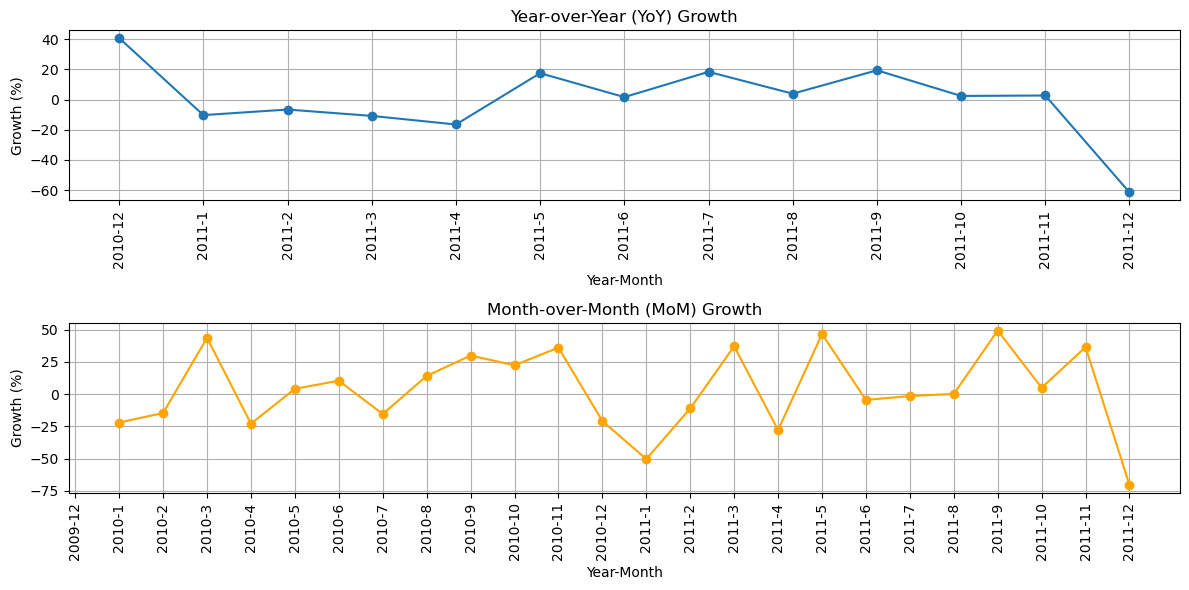

In [6]:
import matplotlib.pyplot as plt

# Create a plot for YoY and MoM Growth
plt.figure(figsize=(12, 6))

# Plotting Year-over-Year (YoY) Growth
plt.subplot(2, 1, 1)
plt.plot(monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str), monthly_revenue['YoY Growth'], label='YoY Growth (%)', marker='o')
plt.title('Year-over-Year (YoY) Growth')
plt.xlabel('Year-Month')
plt.ylabel('Growth (%)')
plt.xticks(rotation=90)
plt.grid(True)

# Plotting Month-over-Month (MoM) Growth
plt.subplot(2, 1, 2)
plt.plot(monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str), monthly_revenue['MoM Growth'], label='MoM Growth (%)', color='orange', marker='o')
plt.title('Month-over-Month (MoM) Growth')
plt.xlabel('Year-Month')
plt.ylabel('Growth (%)')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Revenue
count,1.067371e+06,1067371,1.067371e+06,824364.000000,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,2.010426e+03,7.496765e+00,1.806987e+01
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,2.009000e+03,1.000000e+00,-1.684696e+05
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,2.010000e+03,5.000000e+00,3.750000e+00
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,2.010000e+03,8.000000e+00,9.900000e+00
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,2.011000e+03,1.100000e+01,1.770000e+01
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,2.011000e+03,1.200000e+01,1.684696e+05
std,1.727058e+02,NaN,1.235531e+02,1697.464450,5.737608e-01,3.526416e+00,2.924202e+02


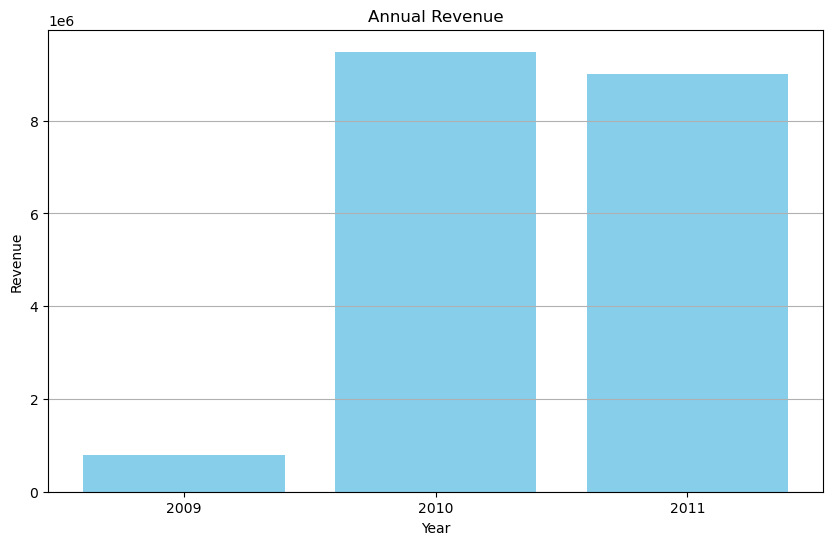

   Year      Revenue
0  2009   799847.110
1  2010  9488594.544
2  2011  8998808.914


In [12]:
# Plotting annual revenue
annual_revenue = df.groupby('Year')['Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(annual_revenue['Year'].astype(str), annual_revenue['Revenue'], color='skyblue')
plt.title('Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(axis='y')

plt.show()
print(annual_revenue)

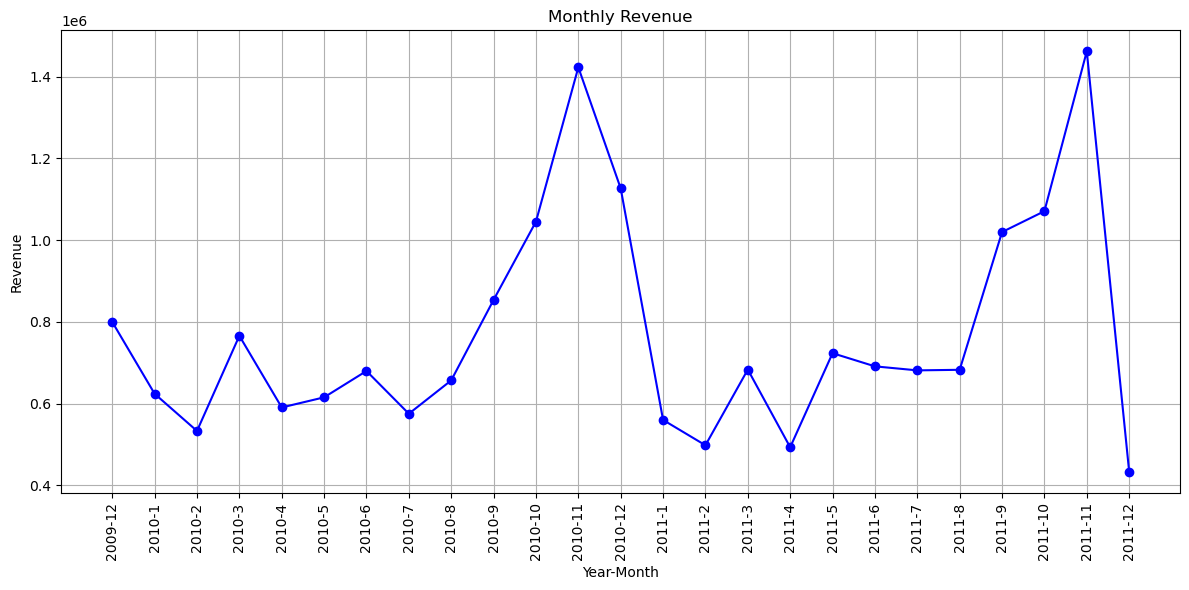

    Year  Month      Revenue  YoY Growth  MoM Growth
0   2009     12   799847.110         NaN         NaN
1   2010      1   624032.892         NaN  -21.980978
2   2010      2   533091.426         NaN  -14.573185
3   2010      3   765848.761         NaN   43.661804
4   2010      4   590580.432         NaN  -22.885501
5   2010      5   615322.830         NaN    4.189505
6   2010      6   679786.610         NaN   10.476416
7   2010      7   575236.360         NaN  -15.379863
8   2010      8   656776.340         NaN   14.175039
9   2010      9   853650.431         NaN   29.975820
10  2010     10  1045168.350         NaN   22.435169
11  2010     11  1422654.642         NaN   36.117272
12  2010     12  1126445.470   40.832599  -20.820877
13  2011      1   560000.260  -10.261099  -50.286075
14  2011      2   498062.650   -6.570876  -11.060282
15  2011      3   683267.080  -10.783027   37.184967
16  2011      4   493207.121  -16.487731  -27.816350
17  2011      5   723333.510   17.553498   46.

In [13]:
# Plotting monthly revenue
monthly_revenue_plot = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Create a new column for Year-Month string
monthly_revenue_plot['Year-Month'] = monthly_revenue_plot['Year'].astype(str) + '-' + monthly_revenue_plot['Month'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_plot['Year-Month'], monthly_revenue_plot['Revenue'], marker='o', color='blue')
plt.title('Monthly Revenue')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

print(monthly_revenue)